In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import operator
from pylab import mpl
import itertools
from sklearn.preprocessing import StandardScaler
 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
 
from sklearn import tree

 
from IPython.display import Image

hd_pd = pd.read_csv('heart_disease_data.csv',header=0)
type(hd_pd["age"])
hd_pd.head()
hd_np = np.array(hd_pd)

In [5]:
hd_pd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,62,1,4,160,254,1,1,108,1,3.0,1
1,46,1,4,140,311,0,0,120,1,1.8,1
2,39,0,3,138,220,0,0,152,0,0.0,0
3,56,1,1,120,193,0,2,162,0,1.9,0
4,43,0,2,120,201,0,0,165,0,0.0,0
5,51,1,4,140,298,0,0,122,1,4.2,1
6,59,1,4,140,274,0,0,154,1,2.0,0
7,58,1,3,132,224,0,2,173,0,3.2,1
8,54,0,2,120,221,0,0,138,0,1.0,0
9,52,1,1,118,186,0,2,190,0,0.0,0


Text(0.5, 0, '得病/未得病比例')

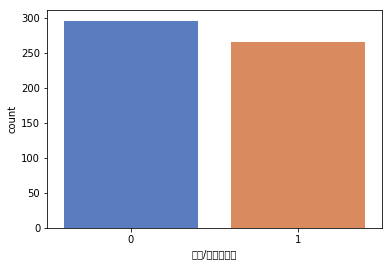

In [6]:
sns.countplot(x='num',data=hd_pd,palette="muted")
plt.xlabel("得病/未得病比例")

In [7]:
first = pd.get_dummies(hd_pd['cp'], prefix = "cp")

In [8]:
hd_pd = pd.concat([hd_pd,first], axis = 1)
hd_pd = hd_pd.drop(columns = ['cp'])
hd_pd.head(3)    

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4
0,62,1,160,254,1,1,108,1,3.0,1,0,0,0,1
1,46,1,140,311,0,0,120,1,1.8,1,0,0,0,1
2,39,0,138,220,0,0,152,0,0.0,0,0,0,1,0


In [9]:
#  y是num，x是因素
y = hd_pd.num.values
x = hd_pd.drop(['num'], axis = 1)
x.shape

(561, 13)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x , y , random_state=6)  #随机种子6

In [11]:
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)    #影响因素归一化


C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jimmy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jimmy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [12]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
#决定系数R2
log_reg.score(x_train,y_train)

0.8023809523809524

In [15]:
log_reg.score(x_test,y_test)

0.8226950354609929

In [16]:
from sklearn.metrics import accuracy_score
y_predict_log = log_reg.predict(x_test)

# 调用accuracy_score计算分类准确度
accuracy_score(y_test,y_predict_log)

0.8226950354609929

In [17]:
param_grid = [
    {
        'C':[0.01,0.1,1,10,100],
        'penalty':['l2','l1'],
        'class_weight':['balanced',None]
    }
]

In [18]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(log_reg,param_grid,cv=10,n_jobs=-1)


In [19]:
#网格搜索
grid_search.fit(x_train,y_train)
GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'l1'], 'class_weight': ['balanced', None]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'l1'], 'class_weight': ['balanced', None]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
grid_search.best_score_

0.7952380952380952

In [23]:
grid_search.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l1'}

In [24]:
log_reg = grid_search.best_estimator_
log_reg.score(x_train,y_train)

0.7976190476190477

In [25]:
log_reg.score(x_test,y_test)

0.8226950354609929

In [26]:
#F1指标
from sklearn.metrics import f1_score

f1_score(y_test,y_predict_log)

0.81203007518797

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_log))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        72
           1       0.84      0.78      0.81        69

   micro avg       0.82      0.82      0.82       141
   macro avg       0.82      0.82      0.82       141
weighted avg       0.82      0.82      0.82       141



In [45]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_predict_log)
cnf_matrix

array([[62, 10],
       [15, 54]], dtype=int64)

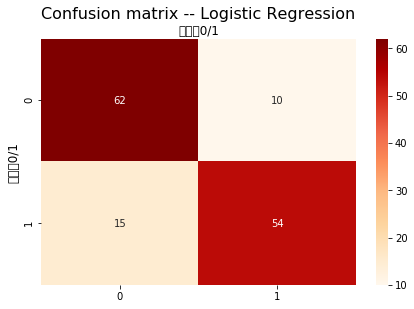

In [46]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('实际值0/1',fontsize=12)
    plt.xlabel('预测值0/1',fontsize=12)
    plt.show()
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- Logistic Regression')

In [47]:
decision_scores = log_reg.decision_function(x_test)

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

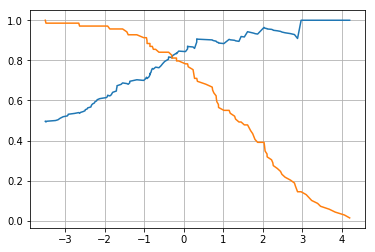

In [48]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()    #没有从最小值开始取,sklearn自己从自己觉得ok的位置开始取

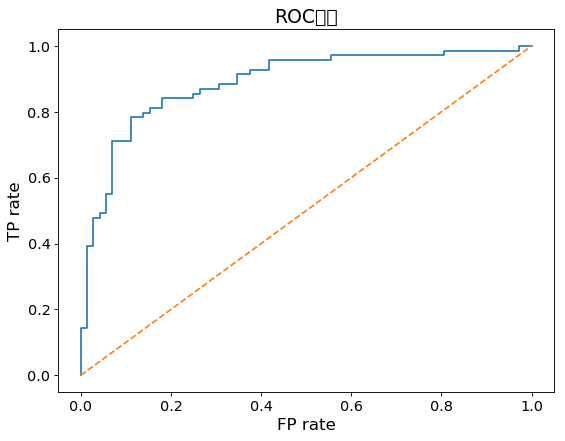

In [49]:
#ROC图像好处：当测试集中的正负样本的分布变化的时候，ROC 曲线能够保持不变。
from sklearn.metrics import roc_curve

fprs,tprs,thresholds = roc_curve(y_test,decision_scores)
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('TP rate',fontsize=15)
    plt.xlabel('FP rate',fontsize=15)
    plt.title('ROC曲线',fontsize=17)
    plt.show()
    
plot_roc_curve(fprs,tprs)

In [66]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,50)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,50)],
        'p':[i for i in range(1,6)]
    }
]

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf,param_grid)

grid_search.fit(x_train,y_train)

C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jimmy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=14, p=2,
           weights='distance')

In [69]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=3,
           weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=3,
           weights='distance')

In [70]:
grid_search.best_score_

0.8

In [71]:
grid_search.best_params_

{'n_neighbors': 14, 'p': 2, 'weights': 'distance'}

In [72]:
knn_clf = grid_search.best_estimator_
knn_clf.score(x_train,y_train)

1.0

In [73]:
knn_clf.score(x_test,y_test)

0.8085106382978723

In [74]:
y_predict_knn = knn_clf.predict(x_test)

In [59]:
f1_score(y_test,y_predict_knn)

0.7906976744186046

In [60]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        72
           1       0.85      0.74      0.79        69

   micro avg       0.81      0.81      0.81       141
   macro avg       0.81      0.81      0.81       141
weighted avg       0.81      0.81      0.81       141



In [61]:
cnf_matrix = confusion_matrix(y_test,y_predict_knn)
cnf_matrix

array([[63,  9],
       [18, 51]], dtype=int64)

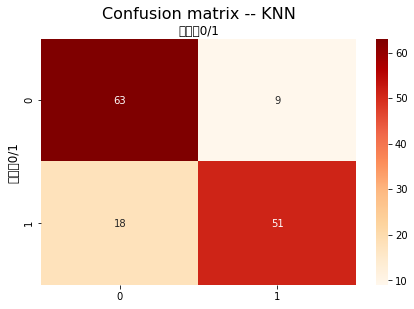

In [62]:
plot_cnf_matirx(cnf_matrix,'Confusion matrix -- KNN')

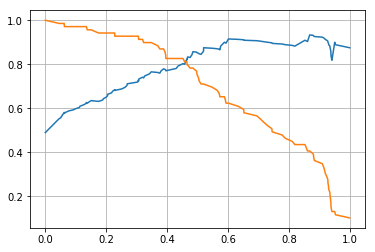

In [63]:
y_probabilities = knn_clf.predict_proba(x_test)[:,1]

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,y_probabilities)

plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()    #没有从最小值开始取,sklearn自己从自己觉得ok的位置开始取

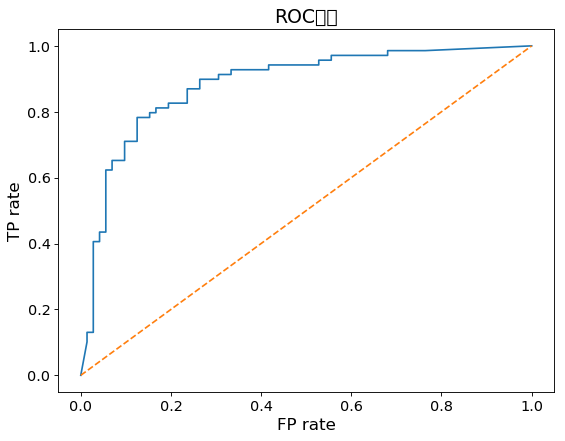

In [64]:
#没有定好阈值，而是将模型预测结果从高到低排序，将每次概率值依次作为阈值，那么就可以得到多个混淆矩阵。
#对于每个混淆矩阵，我们计算两个指标TPR和FPR,以FPR为x轴，TPR为y轴画图，就得到了ROC曲线。
from sklearn.metrics import roc_curve
fprs2,tprs2,thresholds2 = roc_curve(y_test,y_probabilities)
# 此处调用前面的绘制函数
plot_roc_curve(fprs2,tprs2)

In [65]:
from sklearn.metrics import roc_auc_score  #auc:area under curve

roc_auc_score(y_test,y_probabilities)

0.8838566827697263